In [1]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [2]:
import numpy as np
import pandas as pd

In [3]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [4]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[['A', 'D', 'D', 'A'], ['M', 'A', 'D', 'A'], [...","[['A', 'n', 'n', 'A'], ['x', 'A', 'n', 'A'], [..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['A', 'D', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."


In [5]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [6]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [7]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[[A, D, D, A], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, n, A], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [A, D, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[[A, A, D, n], [M, A, D, A], [A, D, D, A], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, n, A], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."


In [8]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [9]:
df.iloc[0]["encoded_sequence"].shape

(14, 8, 4)

In [10]:
# Determine all available modifications (excluding mismatches) that will be held out one-by-one
available_mods = sorted(cat for cat in df['Category'].unique() if cat != 'mismatch')
print(f'Available modifications to exclude: {available_mods}')
print(f'Total unique modifications (excluding mismatch): {len(available_mods)}')


Available modifications to exclude: ['5mC', '6mA', '7dA', '7dG', 'D', 'I', 'dUTP', 'mod_on_both_bases']
Total unique modifications (excluding mismatch): 8


In [11]:
def flatten_tensor(array):
    n_samples = array.shape[0]
    return array.reshape((n_samples, -1))


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [13]:
all_predictions = []
metrics_summary = []

for mod in available_mods:
    mask_test = df['Category'] == mod
    df_test = df[mask_test].copy()
    df_train = df[~mask_test].copy()

    if df_test.empty:
        print(f'Skipping {mod} because no held-out samples are available.')
        continue
    if df_train.empty:
        print(f'Skipping {mod} because no training samples remain.')
        continue

    X_train = np.stack(df_train['encoded_sequence'].to_numpy(), axis=0)
    y_train = df_train['ln(I)'].to_numpy()
    X_test = np.stack(df_test['encoded_sequence'].to_numpy(), axis=0)
    y_test = df_test['ln(I)'].to_numpy()

    X_train_flat = flatten_tensor(X_train)
    X_test_flat = flatten_tensor(X_test)

    linear_reg = LinearRegression()
    linear_reg.fit(X_train_flat, y_train)

    train_r2 = linear_reg.score(X_train_flat, y_train)

    cv_mean = None
    n_splits = min(5, len(df_train))
    if n_splits >= 2:
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)
        cv_scores = cross_val_score(linear_reg, X_train_flat, y_train, cv=kfold)
        cv_mean = cv_scores.mean()

    y_pred = linear_reg.predict(X_test_flat)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    df_mod = df_test.copy()
    df_mod['y_pred'] = y_pred
    df_mod['ExcludedMod'] = mod
    all_predictions.append(df_mod[['ln(I)', 'y_pred', 'ExcludedMod']])

    metrics_summary.append({
        'ExcludedMod': mod,
        'TrainSamples': len(df_train),
        'TestSamples': len(df_test),
        'Train_R2': train_r2,
        'CV_Mean': cv_mean,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
    })

metrics_df = pd.DataFrame(metrics_summary)
metrics_df


,ExcludedMod,TrainSamples,TestSamples,Train_R2,CV_Mean,MAE,MSE,R2
0,5mC,1166,96,0.904010,0.859892,0.293736,0.163785,0.778384
1,6mA,1150,112,0.890941,0.838429,0.160185,0.046463,0.934586
2,7dA,1150,112,0.897971,0.855231,0.224358,0.089841,0.827273
3,7dG,1150,112,0.895893,0.850144,0.199357,0.067476,0.865398
4,D,1166,96,0.892814,0.849499,0.211165,0.081525,0.883555
5,I,1150,112,0.899048,0.853738,0.225532,0.102622,0.829015
6,dUTP,1166,96,0.904996,0.864379,0.297860,0.162053,0.733121
7,mod_on_both_bases,930,332,0.897261,0.834025,0.237531,0.097341,0.848900


In [14]:
metrics_df.sort_values('R2', ascending=False)

,ExcludedMod,TrainSamples,TestSamples,Train_R2,CV_Mean,MAE,MSE,R2
1,6mA,1150,112,0.890941,0.838429,0.160185,0.046463,0.934586
4,D,1166,96,0.892814,0.849499,0.211165,0.081525,0.883555
3,7dG,1150,112,0.895893,0.850144,0.199357,0.067476,0.865398
7,mod_on_both_bases,930,332,0.897261,0.834025,0.237531,0.097341,0.848900
5,I,1150,112,0.899048,0.853738,0.225532,0.102622,0.829015
2,7dA,1150,112,0.897971,0.855231,0.224358,0.089841,0.827273
0,5mC,1166,96,0.904010,0.859892,0.293736,0.163785,0.778384
6,dUTP,1166,96,0.904996,0.864379,0.297860,0.162053,0.733121


In [15]:
combined_predictions = pd.concat(all_predictions, ignore_index=True)
combined_predictions.head()


,ln(I),y_pred,ExcludedMod
0,-0.011960,-0.287449,5mC
1,0.108933,-0.062504,5mC
2,-0.306606,-0.416245,5mC
3,-1.383345,-0.906033,5mC
4,-2.486870,-2.438292,5mC


In [16]:
combined_predictions['ExcludedMod'].value_counts()


ExcludedMod
mod_on_both_bases    332
6mA                  112
7dG                  112
7dA                  112
I                    112
5mC                   96
D                     96
dUTP                  96
Name: count, dtype: int64

In [17]:
metrics_df[['ExcludedMod', 'MAE', 'MSE', 'R2']]


,ExcludedMod,MAE,MSE,R2
0,5mC,0.293736,0.163785,0.778384
1,6mA,0.160185,0.046463,0.934586
2,7dA,0.224358,0.089841,0.827273
3,7dG,0.199357,0.067476,0.865398
4,D,0.211165,0.081525,0.883555
5,I,0.225532,0.102622,0.829015
6,dUTP,0.297860,0.162053,0.733121
7,mod_on_both_bases,0.237531,0.097341,0.848900


In [18]:
metrics_df[['ExcludedMod', 'TrainSamples', 'TestSamples']]


,ExcludedMod,TrainSamples,TestSamples
0,5mC,1166,96
1,6mA,1150,112
2,7dA,1150,112
3,7dG,1150,112
4,D,1166,96
5,I,1150,112
6,dUTP,1166,96
7,mod_on_both_bases,930,332


In [19]:
# Placeholder cell for backward compatibility


In [20]:
metrics_df[['ExcludedMod', 'R2']].set_index('ExcludedMod')


,R2
ExcludedMod,
5mC,0.778384
6mA,0.934586
7dA,0.827273
7dG,0.865398
D,0.883555
I,0.829015
dUTP,0.733121
mod_on_both_bases,0.848900


In [21]:
# Combined predictions already computed


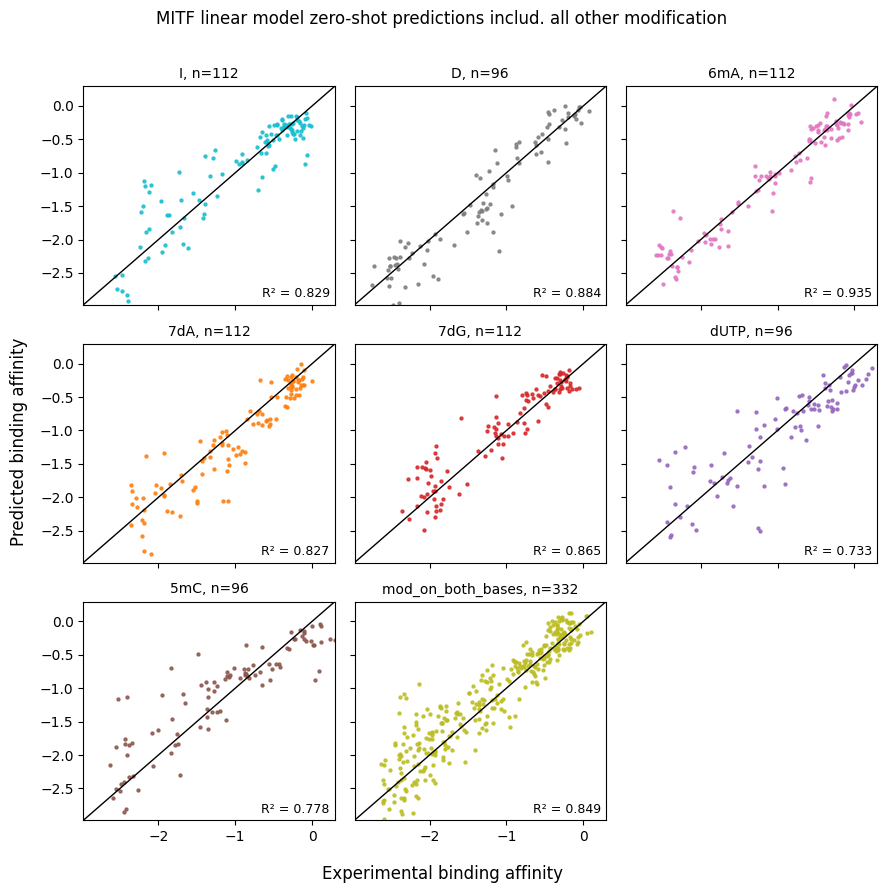

In [22]:
# 3x3 grid of individual prediction scatter plots (one per excluded modification)
from matplotlib import pyplot as plt
from src.constants import COLOR_MODS

mods_for_plot = sorted(combined_predictions['ExcludedMod'].unique())

order = [c for c in COLOR_MODS.keys() if c in mods_for_plot]
order.extend([c for c in mods_for_plot if c not in order])
colors = {cat: COLOR_MODS.get(cat, None) for cat in order}


nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.flatten()

# Global axis limits for consistency across subplots
p1 = max(combined_predictions['ln(I)'].max(), combined_predictions['y_pred'].max())
p2 = min(combined_predictions['ln(I)'].min(), combined_predictions['y_pred'].min())


# Plot in specified 'order' instead of mods_for_plot
for i, mod in enumerate(order):
    ax = axes[i]
    subset = combined_predictions[combined_predictions['ExcludedMod'] == mod]
    if subset.empty:
        ax.axis('off')
        continue

    ax.plot([p2, p1], [p2, p1], 'k', linewidth=1)
    ax.scatter(subset['ln(I)'], subset['y_pred'], s=18, marker='.', alpha=0.85, color=colors.get(mod))

    r2_cat = r2_score(subset['ln(I)'], subset['y_pred'])
    ax.text(0.98, 0.02, f"R² = {r2_cat:.3f}" if r2_cat == r2_cat else "R² = N/A",
            transform=ax.transAxes, ha="right", va="bottom",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7), fontsize=9)

    ax.set_title(f"{mod}, n={len(subset)}", fontsize=10)
    ax.set_xlim(p2, p1)
    ax.set_ylim(p2, p1)

# Turn off any remaining unused axes
for j in range(len(order), len(axes)):
    axes[j].axis('off')



fig.suptitle(f"{TF} linear model zero-shot predictions includ. all other modification", fontsize=12)
fig.supxlabel('Experimental binding affinity')
fig.supylabel('Predicted binding affinity')


plt.tight_layout(rect=[0, 0, 1, 0.97])

os.makedirs('plots', exist_ok=True)
plt.savefig(f"plots/{TF}_linear_zeroshot_including_all_other_mods_grid.pdf")
plt.show()


In [ ]:
from src.encode import groove_encoding_for_strands
from src.constants import TRIVIAL_PREDICTION_MAP

# Helpers to parse strand tokens and trivialize to canonical bases
def to_token_list(x):
    v = x
    if isinstance(v, str):
        try:
            v = literal_eval(v)
        except Exception:
            v = list(v)
    tokens = []
    for t in v:
        if isinstance(t, (list, tuple)):
            tokens.append(t[0] if t else "")
        else:
            tokens.append(str(t))
    return tokens

def trivialize_to_string(tokens):
    return "".join(TRIVIAL_PREDICTION_MAP.get(tok, tok) for tok in tokens)

# For each held-out modification: train zero-shot model and also predict on trivialized sequences
metrics_both = []
predictions_both = []

for mod in available_mods:
    mask_test = df['Category'] == mod
    df_test = df[mask_test].copy()
    df_train = df[~mask_test].copy()

    if df_test.empty or df_train.empty:
        continue

    X_train = np.stack(df_train['encoded_sequence'].to_numpy(), axis=0)
    y_train = df_train['ln(I)'].to_numpy()
    X_test = np.stack(df_test['encoded_sequence'].to_numpy(), axis=0)
    y_test = df_test['ln(I)'].to_numpy()

    X_train_flat = flatten_tensor(X_train)
    X_test_flat = flatten_tensor(X_test)

    model = LinearRegression()
    model.fit(X_train_flat, y_train)

    # Zero-shot on original encodings
    y_pred = model.predict(X_test_flat)

    # Trivial baseline: trivialize strands, re-encode grooves, then predict
    trivial_encoded = []
    for _, row in df_test.iterrows():
        plus_tokens = to_token_list(row['Plus_strand'])
        minus_tokens = to_token_list(row['Minus_strand'])
        plus_str = trivialize_to_string(plus_tokens)
        minus_str = trivialize_to_string(minus_tokens)

        gm, gn = groove_encoding_for_strands(plus_str, minus_str)
        gm_oh, gn_oh = one_hot_encode_grooves(gm, gn)
        enc = np.concatenate(
            [np.asarray(gm_oh, dtype=np.int8), np.asarray(gn_oh, dtype=np.int8)],
            axis=1
        ).astype(np.float32)
        trivial_encoded.append(enc)

    X_trivial = np.stack(trivial_encoded, axis=0)
    X_trivial_flat = X_trivial.reshape((X_trivial.shape[0], -1))
    y_trivial = model.predict(X_trivial_flat)

    # Metrics
    metrics_both.append({
        'ExcludedMod': mod,
        'TrainSamples': len(df_train),
        'TestSamples': len(df_test),
        'ZeroShot_MAE': mean_absolute_error(y_test, y_pred),
        'ZeroShot_MSE': mean_squared_error(y_test, y_pred),
        'ZeroShot_R2': r2_score(y_test, y_pred),
        'Trivial_MAE': mean_absolute_error(y_test, y_trivial),
        'Trivial_MSE': mean_squared_error(y_test, y_trivial),
        'Trivial_R2': r2_score(y_test, y_trivial),
    })

    out = df_test.copy()
    out['y_pred'] = y_pred.astype(np.float32)
    out['y_trivial'] = y_trivial.astype(np.float32)
    out['ExcludedMod'] = mod
    predictions_both.append(out[['ln(I)', 'y_pred', 'y_trivial', 'ExcludedMod']])

combined_predictions_with_trivial = pd.concat(predictions_both, ignore_index=True)
metrics_df_with_trivial = pd.DataFrame(metrics_both)


In [30]:
metrics_df_with_trivial

,ExcludedMod,TrainSamples,TestSamples,ZeroShot_MAE,ZeroShot_MSE,ZeroShot_R2,Trivial_MAE,Trivial_MSE,Trivial_R2
0,I,1150,112,0.225532,0.102622,0.829015,0.205420,0.075798,0.873709
1,D,1166,96,0.211165,0.081525,0.883555,0.211165,0.081525,0.883555
2,6mA,1150,112,0.160185,0.046463,0.934586,0.262650,0.143268,0.798299
3,7dA,1150,112,0.224358,0.089841,0.827273,0.186956,0.065198,0.874652
4,7dG,1150,112,0.199357,0.067476,0.865398,0.293695,0.157515,0.685786
5,dUTP,1166,96,0.297860,0.162053,0.733121,0.303413,0.161825,0.733497
6,5mC,1166,96,0.293736,0.163785,0.778384,0.397504,0.292667,0.603996
7,mod_on_both_bases,930,332,0.237531,0.097341,0.848900,0.313224,0.181738,0.717894


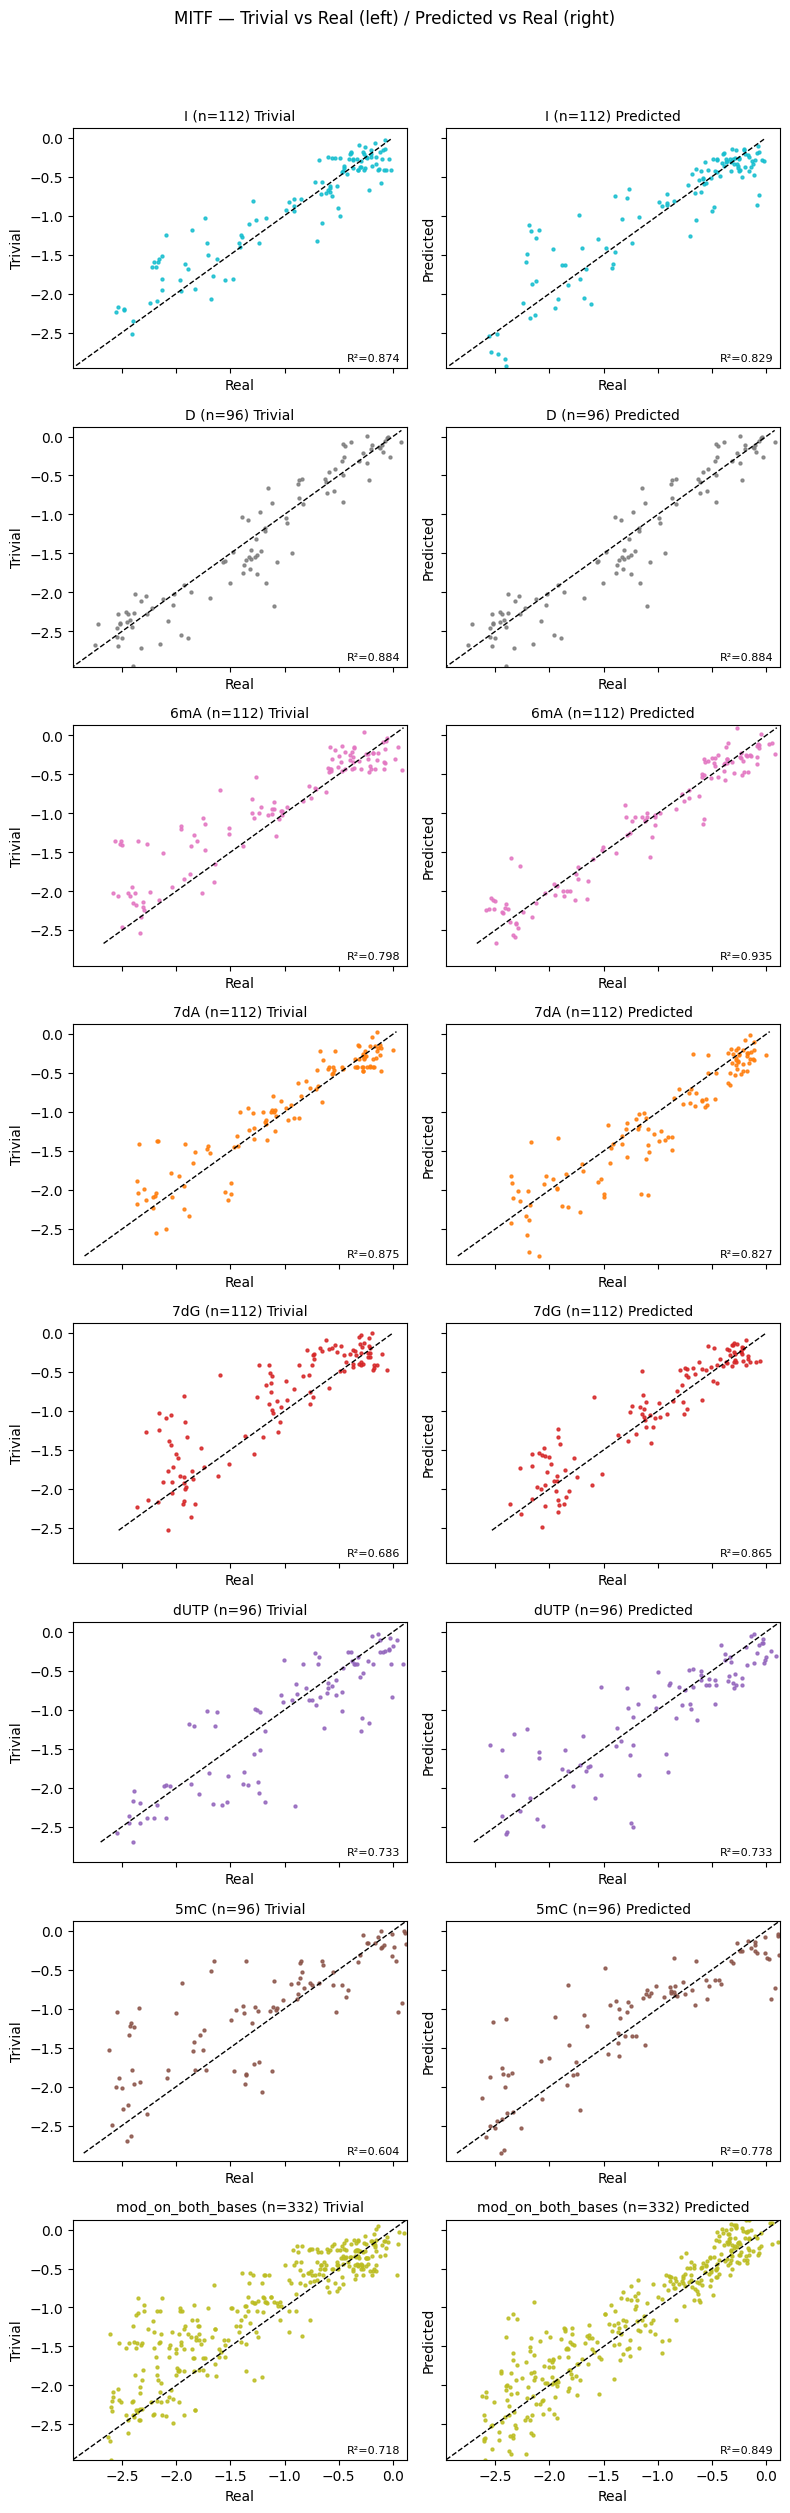

In [33]:
# Two-column figure: (left) Trivial vs Real, (right) Predicted vs Real per excluded modification
mods_available = combined_predictions_with_trivial['ExcludedMod'].unique()
# Reuse ordering from previous plot (cell 22)
mods = [m for m in order if m in mods_available]
mods.extend([m for m in mods_available if m not in mods])

df_mods = combined_predictions_with_trivial.copy()

n_plots = len(mods)
fig, axes = plt.subplots(n_plots, 2, figsize=(8, 3.2 * n_plots), sharex=True, sharey=True)
if n_plots == 1:
    axes = np.array([axes])

for i, mod in enumerate(mods):
    g = df_mods[df_mods['ExcludedMod'] == mod]
    if g.empty:
        axes[i, 0].axis('off')
        axes[i, 1].axis('off')
        continue

    ymin = min(g['ln(I)'].min(), g['y_trivial'].min(), g['y_pred'].min())
    ymax = max(g['ln(I)'].max(), g['y_trivial'].max(), g['y_pred'].max())

    # Trivial vs Real
    ax1 = axes[i, 0]
    ax1.scatter(g['ln(I)'], g['y_trivial'], s=18, alpha=0.85,
                marker='.', c=COLOR_MODS.get(mod))
    ax1.plot([ymin, ymax], [ymin, ymax], 'k--', linewidth=1)
    r2_triv = r2_score(g['ln(I)'], g['y_trivial']) if len(g) >= 2 else float('nan')
    ax1.text(0.98, 0.02, f"R²={r2_triv:.3f}" if r2_triv == r2_triv else "R²=N/A",
             transform=ax1.transAxes, ha='right', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7), fontsize=8)
    ax1.set_title(f"{mod} (n={len(g)}) Trivial", fontsize=10)
    ax1.set_xlabel("Real")
    ax1.set_ylabel("Trivial")
    ax1.set_xlim(ymin, ymax)
    ax1.set_ylim(ymin, ymax)

    # Predicted vs Real
    ax2 = axes[i, 1]
    ax2.scatter(g['ln(I)'], g['y_pred'], s=18, alpha=0.85,
                marker='.', c=COLOR_MODS.get(mod))
    ax2.plot([ymin, ymax], [ymin, ymax], 'k--', linewidth=1)
    r2_pred = r2_score(g['ln(I)'], g['y_pred']) if len(g) >= 2 else float('nan')
    ax2.text(0.98, 0.02, f"R²={r2_pred:.3f}" if r2_pred == r2_pred else "R²=N/A",
             transform=ax2.transAxes, ha='right', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7), fontsize=8)
    ax2.set_title(f"{mod} (n={len(g)}) Predicted", fontsize=10)
    ax2.set_xlabel("Real")
    ax2.set_ylabel("Predicted")
    ax2.set_xlim(ymin, ymax)
    ax2.set_ylim(ymin, ymax)

fig.suptitle(f"{TF} — Trivial vs Real (left) / Predicted vs Real (right)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
